In [45]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Weather.csv')

/Users/sahibachopra/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.shape

(119040, 31)

In [6]:
final_data = data.fillna(0)

In [7]:
final_data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,0.0,25.555556,22.222222,23.888889,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10001,1942-7-2,0,0.0,28.888889,21.666667,25.555556,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,10001,1942-7-3,2.54,0.0,26.111111,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10001,1942-7-4,2.54,0.0,26.666667,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,10001,1942-7-5,0,0.0,26.666667,21.666667,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [8]:
final_data = final_data[['MaxTemp', 'MinTemp', 'MeanTemp', 'WindGustSpd', 'Precip']]

In [10]:
final_data.dtypes

MaxTemp        float64
MinTemp        float64
MeanTemp       float64
WindGustSpd    float64
Precip          object
dtype: object

In [15]:
final_data['Precip'] = np.where(final_data['Precip'].str.contains('T'), np.nan, final_data['Precip'])

In [17]:
final_data = final_data.dropna()

In [21]:
final_data['Precip'] = final_data['Precip'].astype('float')

In [22]:
final_data.dtypes

MaxTemp        float64
MinTemp        float64
MeanTemp       float64
WindGustSpd    float64
Precip         float64
dtype: object

## random forest regression

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [23]:
yVar = final_data['MaxTemp']
xVar = final_data.loc[:, final_data.columns != 'MaxTemp']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2, random_state=0)

In [37]:
rf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)

In [38]:
model = rf.fit(X_train, y_train)

In [39]:
model.score(X_test, y_test)

0.98893359390757696

In [40]:
model.feature_importances_

array([  3.89646090e-02,   9.60222758e-01,   3.22659210e-06,
         8.09406050e-04])

In [43]:
X_test.head()

,MinTemp,MeanTemp,WindGustSpd,Precip
89090,7.222222,14.444444,0.0,0.000
88867,1.666667,13.333333,0.0,0.000
89710,0.555556,5.555556,0.0,0.000
88903,10.000000,21.666667,0.0,0.000
110999,23.333333,27.777778,0.0,1.016


In [50]:
col = ['MinTemp' ,'MeanTemp' ,'WindGustSpd' , 'Precip']

y = model.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature Importance')
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

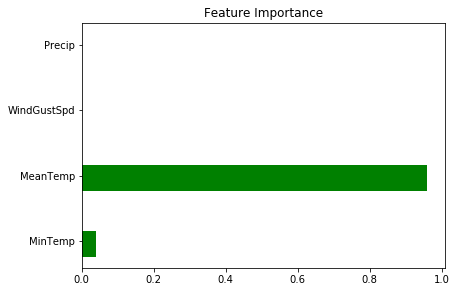

In [51]:
plt.show()